# Assignment: Trees

## Do two questions in total: "Q1+Q2" or "Q1+Q3"

`! git clone https://github.com/ds3001f25/linear_models_assignment.git`

**Q1.** Please answer the following questions in your own words.
1. Why is the Gini a good loss function for categorical target variables? 
2. Why do trees tend to overfit, and how can this tendency be constrained? 
3. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates. 
4. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?
5. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

1. 

The Gini is a good loss function for categorical target variables because it measures the probability of incorrectly classifying a random chosen element. It is much easier to calculate comparedd to entropy and handles multi-class problems without any modification. 

2. 

Trees tend to overfit because their depth depends on the data, where small changes in the data can produce very different trees. This can lead to boundaries that fit the training data but don't generalize to the rest of the testing data. This can be constrained by limitting the depth of the tree, also called regularization. 

3.

False.

Trees perform well in situations with both categorical and continuous variables. They can capture non-linear relationships in continuous variables without transofrmation through threshold splits and can handle mixed data types easily. 

4.

Most versions use binary splits because the binary trees are deeper but simpler at each node, making the tree easier to interpret and visualize. Having more than two branches at a spit can fragment the data too quickly, leaving insufficient data in the child nodes. Binary splits are also more computationally effieicnt to run and provide more generalizable boundaries. 

5. 

A tree is likely overfitting if it is very deep and has many leaf nodes but not very many samples. There is likely a large gap between training accuracy and the test accuracy with very specific decision rules. 

A tree is likely underfitting if it is very shallow with low accuracy for both the training and test sets. It likely has decision rules that are too general or simple.

**Q2.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy? 

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
#2.1
df = pd.read_csv('data/Breast Cancer METABRIC.csv')
print(df.shape)
print(df.head())
print(df.columns.tolist())


(2509, 34)
  Patient ID  Age at Diagnosis Type of Breast Surgery    Cancer Type  \
0    MB-0000             75.65             Mastectomy  Breast Cancer   
1    MB-0002             43.19      Breast Conserving  Breast Cancer   
2    MB-0005             48.87             Mastectomy  Breast Cancer   
3    MB-0006             47.68             Mastectomy  Breast Cancer   
4    MB-0008             76.97             Mastectomy  Breast Cancer   

                        Cancer Type Detailed Cellularity Chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN           No   
1           Breast Invasive Ductal Carcinoma        High           No   
2           Breast Invasive Ductal Carcinoma        High          Yes   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate          Yes   
4  Breast Mixed Ductal and Lobular Carcinoma        High          Yes   

  Pam50 + Claudin-low subtype  Cohort ER status measured by IHC  ...  \
0                 claudin-low     1.0        

In [4]:
#2.2
numeric_vars = ['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']
categorical_vars = ['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']

X_numeric = df[numeric_vars].copy()
X_categorical = pd.get_dummies(df[categorical_vars], drop_first=True)
X = pd.concat([X_numeric, X_categorical], axis=1)

Overall Survival Status
Deceased    1144
Living       837
Name: count, dtype: int64
                  Pred: DECEASED  Pred: LIVING
Actual: DECEASED             679           111
Actual: LIVING               233           377
accuracy: 0.7542857142857143


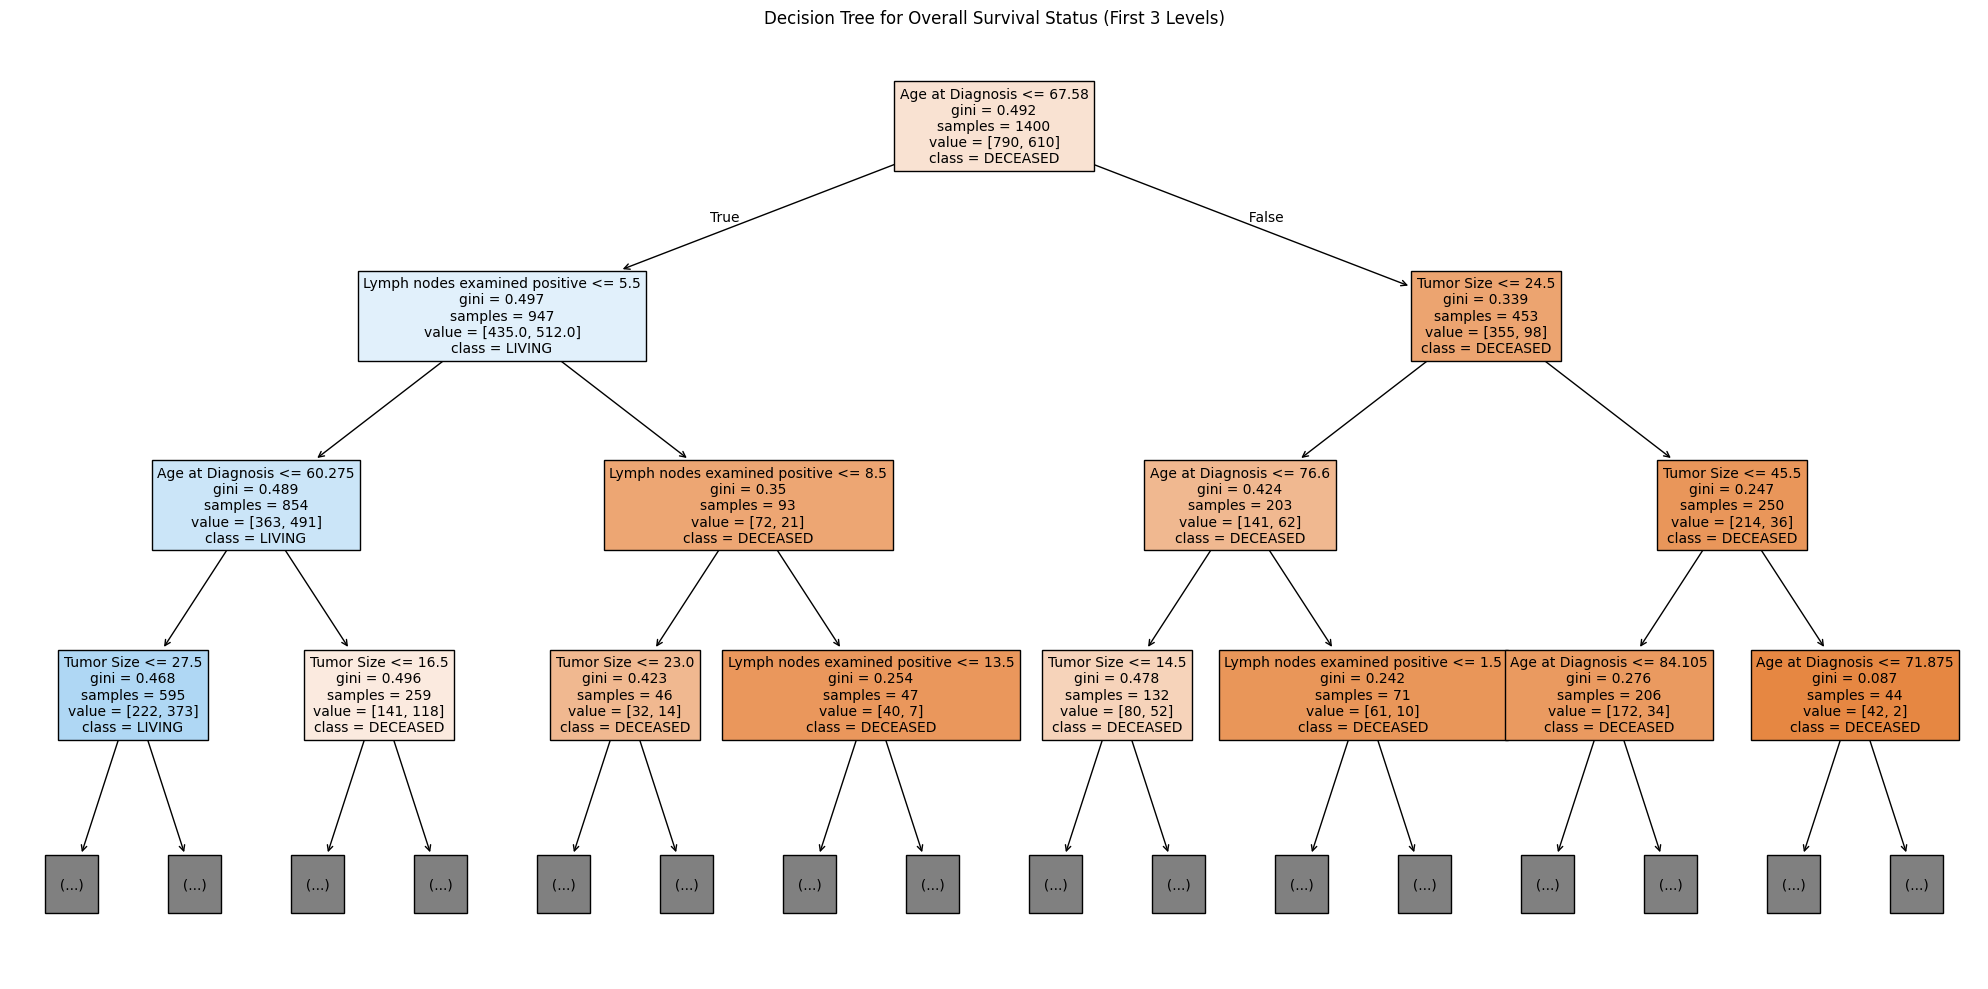

In [9]:
#2.3
y_survival = df['Overall Survival Status'].copy()
print(y_survival.value_counts())

mask = y_survival.notna()
X_clean = X[mask].copy()
y_clean = y_survival[mask].copy()

mask_features = X_clean.notna().all(axis=1)
X_clean = X_clean[mask_features]
y_clean = y_clean[mask_features]

clf = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
clf.fit(X_clean, y_clean)

y_pred = clf.predict(X_clean)

cm = confusion_matrix(y_clean, y_pred)
print(pd.DataFrame(cm, 
                   index=['Actual: DECEASED', 'Actual: LIVING'],
                   columns=['Pred: DECEASED', 'Pred: LIVING']))

accuracy = accuracy_score(y_clean, y_pred)
print('accuracy:', accuracy)

plt.figure(figsize=(20, 10))
plot_tree(clf, 
          feature_names=X_clean.columns,
          class_names=['DECEASED', 'LIVING'],
          filled=True,
          max_depth=3,
          fontsize=10)
plt.title("Decision Tree for Overall Survival Status (First 3 Levels)")
plt.tight_layout()
plt.savefig('survival_tree.png', dpi=150, bbox_inches='tight')
plt.show()



In [15]:
#2.4
TN = cm[1, 1]
FP = cm[1, 0]
FN = cm[0, 1]
TP = cm[0, 0]

TPR = TP / (TP + FN)
print('true positive rate (sensitivity):', TPR)

TNR = TN / (TN + FP)
print('true negative rate (specificity):', TNR)

print('The model performs better by using the TPR metric than the TNR metric. This suggests the model is more sensitive to the decreased class.')

true positive rate (sensitivity): 0.859493670886076
true negative rate (specificity): 0.6180327868852459
The model performs better by using the TPR metric than the TNR metric. This suggests the model is more sensitive to the decreased class.


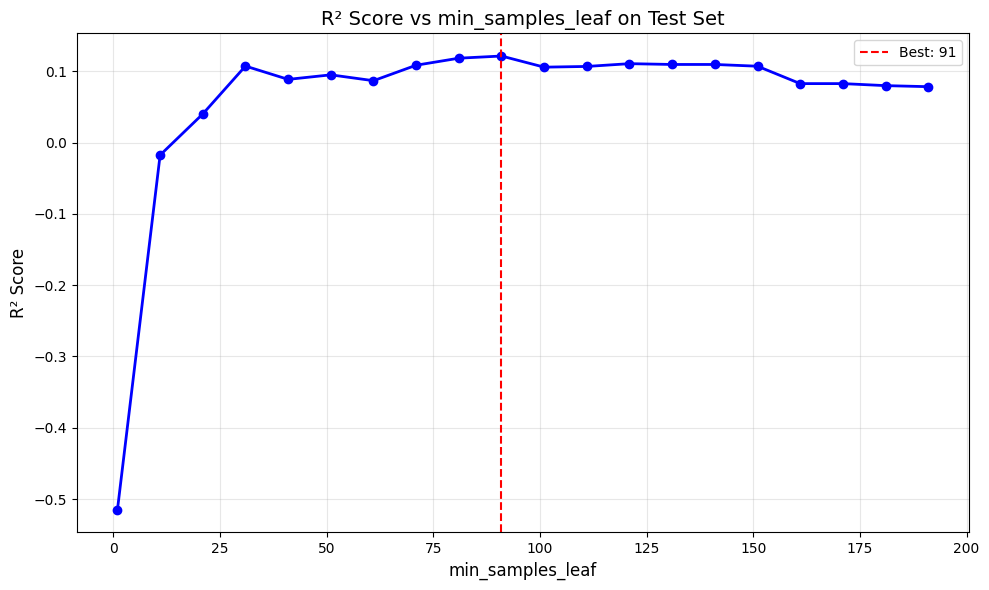

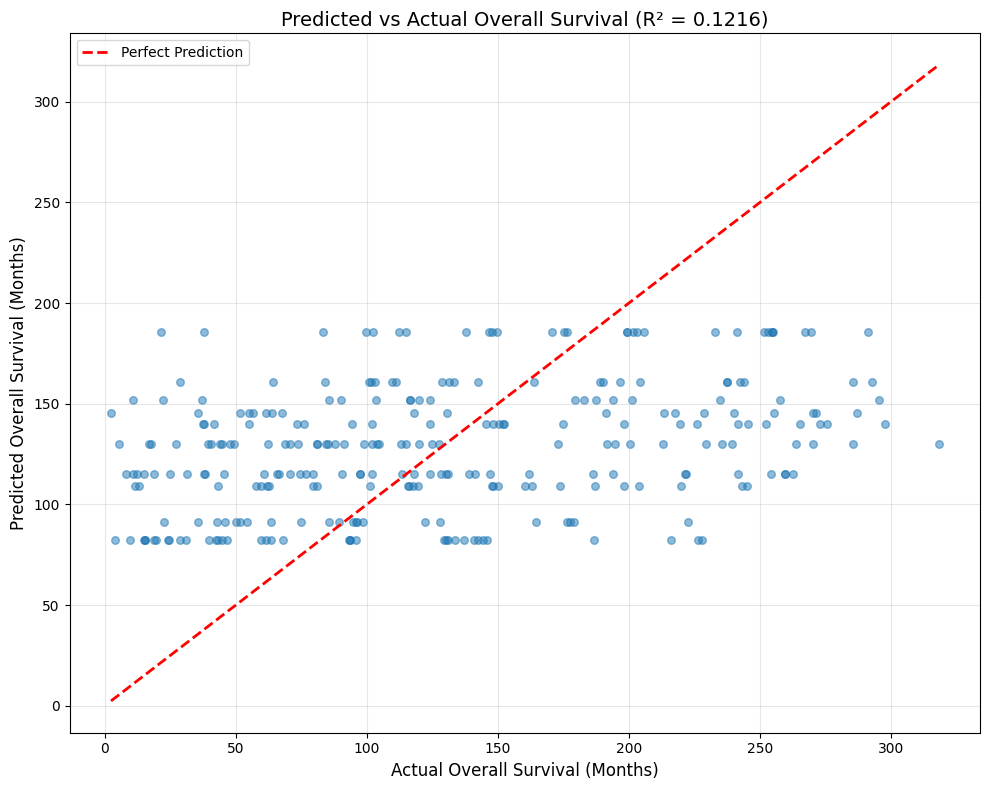


For clinical purposes, this model has several concerns which include the R² being only 0.1216 which explains
only 12.16% of the variance in survival time, which means the majority of survival variation is not captured. 
Another concern is the Mean Absolute Error being 63.2 months which means the predictions could vary significantly.



In [19]:
#2.5
y_months = df['Overall Survival (Months)'].copy()

mask = y_months.notna()
X_reg = X[mask].copy()
y_reg = y_months[mask].copy()

mask_features = X_reg.notna().all(axis=1)
X_reg = X_reg[mask_features]
y_reg = y_reg[mask_features]

X_train, X_test, y_train, y_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

best_r2 = -np.inf
best_param = None
r2_scores = []
params_to_test = range(1, 201, 10)

for param in params_to_test:
    reg = DecisionTreeRegressor(min_samples_leaf=param, random_state=42)
    reg.fit(X_train, y_train)
    y_pred_test = reg.predict(X_test)
    r2 = r2_score(y_test, y_pred_test)
    r2_scores.append(r2)
    if r2 > best_r2:
        best_r2 = r2
        best_param = param

plt.figure(figsize=(10, 6))
plt.plot(params_to_test, r2_scores, 'b-o', linewidth=2, markersize=6)
plt.axvline(best_param, color='r', linestyle='--', label=f'Best: {best_param}')
plt.xlabel('min_samples_leaf', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.title('R² Score vs min_samples_leaf on Test Set', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('r2_vs_min_samples_leaf.png', dpi=150, bbox_inches='tight')
plt.show()

reg_final = DecisionTreeRegressor(min_samples_leaf=best_param, random_state=42)
reg_final.fit(X_train, y_train)
y_pred_test_final = reg_final.predict(X_test)

r2_final = r2_score(y_test, y_pred_test_final)

y_pred_train = reg_final.fit(X_train, y_train).predict(X_train)
r2_train = r2_score(y_train, y_pred_train)

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_test_final, alpha=0.5, s=30)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Overall Survival (Months)', fontsize=12)
plt.ylabel('Predicted Overall Survival (Months)', fontsize=12)
plt.title(f'Predicted vs Actual Overall Survival (R² = {r2_final:.4f})', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('predicted_vs_actual.png', dpi=150, bbox_inches='tight')
plt.show()

residuals = y_test - y_pred_test_final
mae = np.mean(np.abs(residuals))
rmse = np.sqrt(np.mean(residuals**2))

print(f"""
For clinical purposes, this model has several concerns which include the R² being only {r2_final:.4f} which explains
only 12.16% of the variance in survival time, which means the majority of survival variation is not captured. 
Another concern is the Mean Absolute Error being {mae:.1f} months which means the predictions could vary significantly.
""")

**Q3.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?